# Bugli 2021 Models

Data from M. Bugli et al., with permission for use in SNEWS2.0.

Reference: M. Bugli, J. Guilet and M. Obergaulin, "Three-dimensional core-collapse supernovae with complex magnetic structures: I. Explosion dynamics", MNRAS 507 (2021) 1
- https://doi.org/10.1093/mnras/stab2161
- https://arxiv.org/abs/2105.00665

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models.ccsn import Bugli_2021
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

mpl.rc('font', size=16)
%matplotlib inline

## Initialize Models

To start, let’s see what progenitors are available for the `Bugli_2021` model. We can use the `param` property to view all physics parameters and their possible values:

In [6]:
Bugli_2021.param

{'Bfield': ['hydro', 'L1', 'L2'],
 'direction': ['average', 'equator', 'north', 'south'],
 'grav': ['A', 'B', None],
 'rotation': [0, 90, None]}

We’ll initialise both of these progenitors. If this is the first time you’re using a progenitor, snewpy will automatically download the required data files for you.

In [7]:
mhydro = Bugli_2021(Bfield='hydro',direction='average') 
mL1 = Bugli_2021(Bfield='L1',direction='average',rotation=90)
mL2 = Bugli_2021(Bfield='L2',direction='average',grav='A')

mL1

**Bugli_2021 Model**: L1_b12_3d_90deg_snewpy_average.dat

|Parameter|Value|
|:--------|:----:|
|Bfield | L1 |
|Direction | average |
|Rotation | 90 |
|Grav | None |
|Progenitor mass | $35$ $\mathrm{M_{\odot}}$|
|EOS | LS220 |

Finally, let’s plot the luminosity of different neutrino flavors for this model.

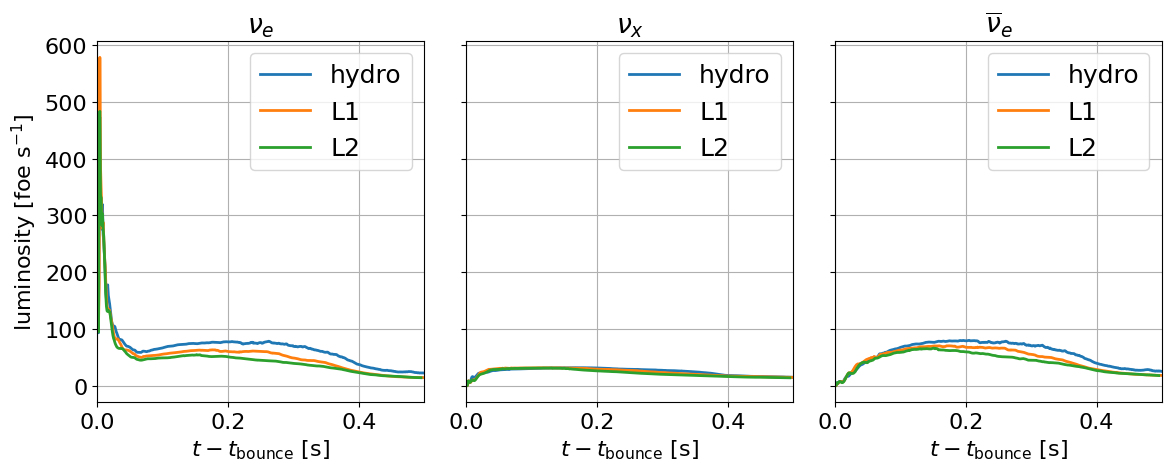

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharex=True, sharey=True, tight_layout=True)

#for i, model in enumerate([mhydro,mL1, mL2]):
for i, flavor in enumerate(Flavor):
    if i>2:
        continue
    ax = axes[i]
    #print(model.metadata)
    #for flavor in Flavor:
    for model in [mhydro,mL1, mL2]:
        #print(model.luminosity[flavor]/1e51)
        #print(model.time/1000.)
        ax.plot(model.time, model.luminosity[flavor]/1e51,  # Report luminosity in units foe/s
                label = model.metadata['Bfield'],
                # label=flavor.to_tex(),
                # color='C0' if flavor.is_electron else 'C1',
                # ls='-' if flavor.is_neutrino else ':',
                lw=2)
    ax.set(xlim=(0.0, 0.5),
           xlabel=r'$t-t_{\rm bounce}$ [s]',
           title= flavor.to_tex()) #r'Magnetic field: {}'.format(model.metadata['Bfield']))#, model.metadata['Progenitor mass'].value))
           #title=r'{}: {} $M_\odot$'.format(model.metadata['EOS'], model.metadata['Progenitor mass'].value))
    ax.grid()
    ax.legend(loc='upper right', ncol=1, fontsize=18)

axes[0].set(ylabel=r'luminosity [foe s$^{-1}$]');